In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
x=2*np.random.rand(100,1)
y=4+3*x+np.random.rand(100,1)

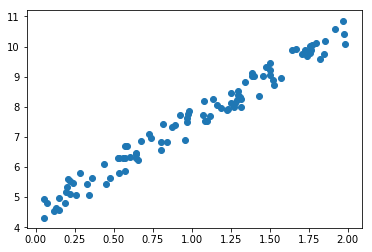

In [3]:
plt.scatter(x,y)

In [4]:
X_b=np.c_[np.ones((100,1)),x]
X_b

array([[1.        , 1.07699641],
       [1.        , 0.67551453],
       [1.        , 1.08702833],
       [1.        , 1.11363191],
       [1.        , 1.18709124],
       [1.        , 0.05360104],
       [1.        , 1.85026821],
       [1.        , 1.22248757],
       [1.        , 0.72554755],
       [1.        , 0.9763357 ],
       [1.        , 0.98215322],
       [1.        , 1.28976299],
       [1.        , 0.5247056 ],
       [1.        , 0.64352623],
       [1.        , 0.80207957],
       [1.        , 1.13266993],
       [1.        , 0.21884513],
       [1.        , 1.52530451],
       [1.        , 1.27459891],
       [1.        , 1.31613274],
       [1.        , 0.11349334],
       [1.        , 1.3169071 ],
       [1.        , 0.15052468],
       [1.        , 0.25715805],
       [1.        , 0.20764916],
       [1.        , 0.45288951],
       [1.        , 0.53065508],
       [1.        , 1.81924493],
       [1.        , 1.57181019],
       [1.        , 1.98296702],
       [1.

In [5]:
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.51043524],
       [3.03301497]])

In [6]:
X_new=[[0],
       [2]]
X_new_b=np.c_[np.ones((2,1)),X_new]
y_predict=X_new_b.dot(theta_best)
y_predict

array([[ 4.51043524],
       [10.57646519]])

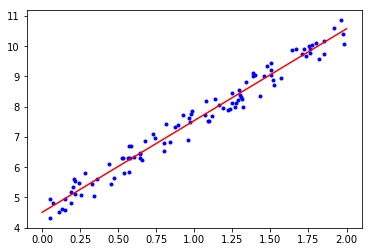

In [7]:
plt.plot(x,y,'b.')
plt.plot(X_new,y_predict,'r-')
ax=plt.gca()

In [8]:
ax.set_xlim([0,2])
ax.set_ylim([0,15])
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x,y)
print(lin_reg.intercept_,lin_reg.coef_)

[4.51043524] [[3.03301497]]


In [10]:
np.random.seed(42)
eta=0.1
n_iterations=1000
m=len(x)
theta = np.random.randn(2,1)
theta_list=[]

for iterations in range(n_iterations):
    gradient=2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta-eta*gradient
    theta_list.append(theta)

In [11]:
theta_array=np.array(theta_list)

In [12]:
theta_array.shape
theta_array[0]

array([[1.9314376 ],
       [1.48793833]])

In [13]:
def plot_gradient_descent(theta,eta,theta_path=None):
    m=len(X_b)
    n_iterations=1000
    plt.plot(x,y,'b.')
    for iterations in range(n_iterations):
        if iterations<20:
            y_predict=X_new_b.dot(theta)
            style="b-" if iterations>0 else 'r--'
            plt.plot(X_new,y_predict,style)
        gradient=2/m * X_b.T.dot(X_b.dot(theta)-y)
        theta=theta-eta*gradient
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$",fontsize=18)
    plt.title(f"$\eta={eta}$",fontsize=18)

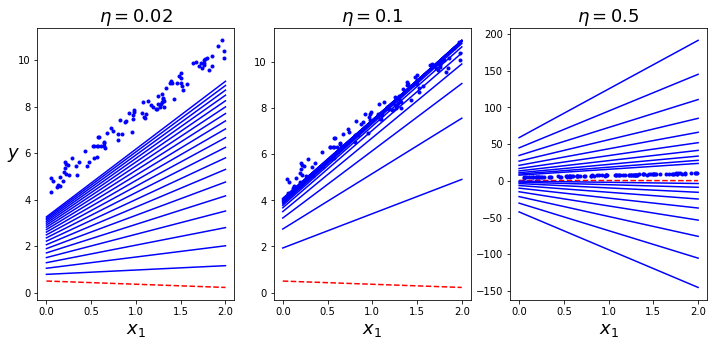

In [14]:
np.random.seed(42)
theta=np.random.randn(2,1)
theta_path_bgd=[]
plt.figure(figsize=(12,5))
plt.subplot(131)
plot_gradient_descent(theta,eta=0.02)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.subplot(132)
plot_gradient_descent(theta,eta=0.1,theta_path=theta_path_bgd)
plt.subplot(133)
plot_gradient_descent(theta,eta=0.5)

#Implementing Stocastic Gradient Descent

In [15]:
def learning_schedule(t):
    return t0/(t+tn)
t0,tn=5,50
epochs=50
m=len(X_b)

for epoch in range(epochs):
    for ii in range(m):
        random_index=np.random.randint(m)
        xi=X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradient=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch * m + ii)
        theta=theta-eta*gradient

In [16]:
def plot_stochastic_gradient(theta,t0,tn,epochs,m):
    plt.plot(x,y,'b.')
    for epoch in range(epochs):
        if epoch <5:
            y_predict=X_new_b.dot(theta)
            style="b-" if epoch>0 else 'r--'
            plt.plot(X_new,y_predict,'g-')
        for ii in range(m):
            random_index=np.random.randint(m)
            xi=X_b[random_index:random_index+1]
            yi=y[random_index:random_index+1]
            gradient=2*xi.T.dot(xi.dot(theta)-yi)
            eta=learning_schedule(epoch * m + ii)
            theta=theta-eta*gradient

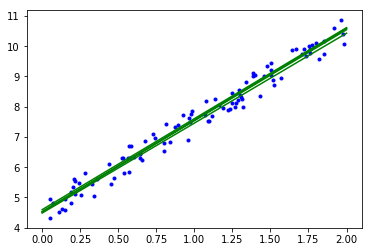

In [17]:
plot_stochastic_gradient(theta,5,50,5,len(x))

In [18]:
from sklearn.linear_model import SGDRegressor
sgdregg=SGDRegressor(max_iter=1000, eta0=0.1, tol=1e-3,penalty=None)
sgdregg.fit(X_b,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=1000,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [19]:
print(sgdregg.intercept_,sgdregg.coef_)

[2.26397687] [2.26397687 3.03668581]


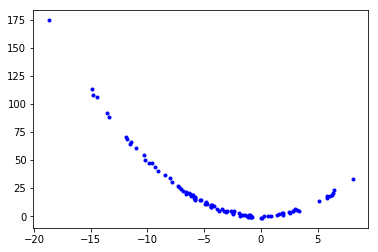

In [20]:
np.random.seed(42)
m=100
X=6*np.random.randn(m,1)-3
y=0.5*X**2+0.05*X+np.random.randn(m,1)
plt.plot(X,y,'b.')

#polynomia Regression

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X)
print(X[0],X_poly[0])

[-0.01971508] [-0.01971508  0.00038868]


In [22]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
print(lin_reg.intercept_,lin_reg.coef_)

[-0.12990531] [[0.06811444 0.50512305]]


In [23]:
X_new=np.linspace(-3,3,100).reshape(100,1)
poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_new_poly=poly_features.fit_transform(X_new)
y_new=lin_reg.predict(X_new_poly)

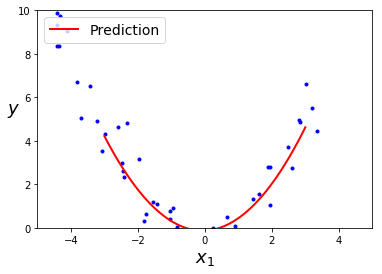

In [24]:
plt.plot(X,y,'b.')
plt.plot(X_new,y_new,'r-',linewidth=2,label='Prediction')
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",fontsize=18,rotation=0)
plt.legend(loc="upper left",fontsize=14)
plt.axis([-5,5,0,10])
plt.show()

#Learning Curves

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curve(model,x,y):
    X_train,X_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=42)
    train_error,val_error=[],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        train_predict=model.predict(X_train[:m])
        train_error.append(np.sqrt(mean_squared_error(y_train[:m],train_predict)))
        val_predict=model.predict(X_val[:m])
        val_error.append(np.sqrt(mean_squared_error(y_val[:m],val_predict)))
    plt.plot(train_error,'r-+',linewidth=2,label="train")
    plt.plot(val_error,'b-',linewidth=2,label='test')
    plt.xlabel("Training set Size",fontsize=12)
    plt.ylabel("RMSE",fontsize=12)

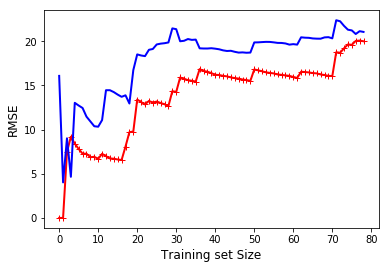

In [26]:
lin_reg=LinearRegression()
plot_learning_curve(lin_reg,X,y)

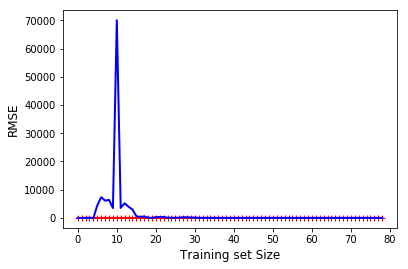

In [27]:
from sklearn.pipeline import Pipeline
linear_pipeline=Pipeline([('poly_feature',PolynomialFeatures(degree=10,include_bias=False)),
                          ('lin_reg',LinearRegression())])
plot_learning_curve(linear_pipeline,X,y)

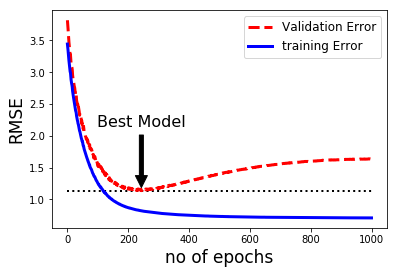

In [28]:
np.random.seed(42)
x=6 * np.random.rand(100,1)-3
y=0.5 * x**2 + x + 2 + np.random.randn(100,1)

X_train, X_val, y_train, y_val=train_test_split(x[:50],y[:50].ravel(),random_state=10, test_size=0.5)

from sklearn.preprocessing import StandardScaler
poly_features=Pipeline([('poly_feature',PolynomialFeatures(degree=90,include_bias=False)),
                        ('std_scaling',StandardScaler())
                       ])

X_train_poly=poly_features.fit_transform(X_train)
X_val_poly=poly_features.transform(X_val)

sgd=SGDRegressor(max_iter=1,
                 tol=-np.infty,
                 eta0=0.0005,
                 learning_rate="constant",
                 penalty=None,
                 warm_start=True)

train_error,val_error=[],[]

for epoch in range(1000):
    sgd.fit(X_train_poly,y_train)
    y_values_train=sgd.predict(X_train_poly)
    train_error.append(mean_squared_error(y_train,y_values_train))
    y_values_val=sgd.predict(X_val_poly)
    val_error.append(mean_squared_error(y_val,y_values_val))


best_epoch=np.argmin(val_error)
best_rmse=np.sqrt(val_error[best_epoch])

type(train_error)

val_error

plt.annotate('Best Model',
            xy=(best_epoch,best_rmse),
            xytext=(best_epoch,best_rmse+1),
            ha='center',
            arrowprops=dict(facecolor='black',shrink=0.05),
            fontsize=16
            )
plt.plot([0,1000],[best_rmse,best_rmse],'k:',linewidth=2)
plt.plot(np.sqrt(val_error),'r--',linewidth=3,label='Validation Error')
plt.plot(np.sqrt(train_error),'b-',linewidth=3,label="training Error")
plt.legend(loc='upper right',fontsize=12)
plt.xlabel("no of epochs",fontsize=17)
plt.ylabel("RMSE",fontsize=17)
plt.show()

#Implementing logistic regression model

In [29]:
from sklearn import datasets
iris=datasets.load_iris()
X=iris['data'][:,3:]
y=(iris['target']==2).astype(np.int16)

In [30]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression(random_state=42)
logit.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

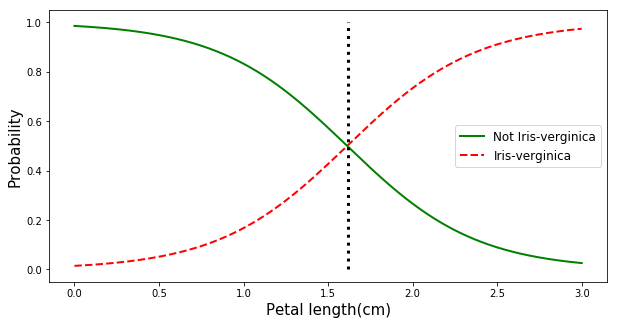

In [31]:
X_new=np.linspace(0,3,1000).reshape(-1,1)
log_proba=logit.predict_proba(X_new)
descision_boundary=X_new[log_proba[:,1]>=0.5][0]
plt.figure(figsize=(10,5))
plt.plot(X_new,log_proba[:,0],'g-',linewidth=2,label="Not Iris-verginica")
plt.plot(X_new,log_proba[:,1],'r--',linewidth=2,label="Iris-verginica" )
plt.plot([descision_boundary,descision_boundary],[0,1.0],'k:',linewidth=3)
plt.ylabel("Probability",fontsize=15)
plt.xlabel("Petal length(cm)",fontsize=15)
plt.legend(loc="middle",fontsize=12)
plt.show()

In [32]:
logit.predict([[1.7],
              [1.2]])

array([1, 0], dtype=int16)

In [33]:
X=iris['data'][:,(2,3)]
y=(iris['target']==2).astype(np.int)
logit.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
x0,x1=np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new=np.c_[x0.ravel(),x1.ravel()]
logit=LogisticRegression(solver="liblinear",C=10**10,random_state=42)
logit.fit(X,y)
y_proba=logit.predict_proba(X_new)

In [35]:
X[y==0,1].mean(),X[y==0,1].std()

(0.7859999999999998, 0.5623201934841039)

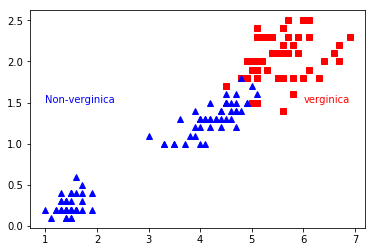

In [36]:
plt.plot(X[y==1,0],X[y==1,1],'rs')
plt.plot(X[y==0,0],X[y==0,1],'b^')
plt.text(1,1.5,"Non-verginica",color='blue')
plt.text(6,1.5,"verginica",color='red')
plt.show()

#Softmax Regression

In [37]:
X=iris['data'][:]
y=iris['target']
logit=LogisticRegression(random_state=42, multi_class='multinomial',solver='lbfgs',C=10)
logit.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
X_new=[[4,3.1,1,0.5]]
y_predict=logit.predict_proba(X_new)
y_predict*100

array([[9.99733629e+01, 2.66371340e-02, 4.16889032e-13]])

#Implementing Batch Gradient Descent with early stopping for softmax regression

In [57]:
X=iris['data']
y=iris['target'].reshape((-1,1))

#Adding bias term to X (x0=1)

In [54]:
X_with_bias=np.c_[np.ones([len(X),1]),X]

In [60]:
np.random.seed(42)

#1. Calculating the sizes of validation, train and test sizes from data
#2. Shuffling the indices

In [68]:
test_ratio=0.2
validation_ratio=0.2
total_size=len(X_with_bias)

validation_size=int(total_size * validation_ratio)
test_size=int(total_size * test_ratio)
train_size=total_size-test_size-validation_size

rnd_indices=np.random.permutation(total_size)
test_size,train_size,validation_size

(30, 90, 30)

#1. Now seperating training, validation and testing set

In [70]:
X_train=X_with_bias[rnd_indices[:train_size]]
y_train=y[rnd_indices[:train_size]]
X_valid=X_with_bias[rnd_indices[train_size:-test_size]]
y_valid=y[rnd_indices[train_size:-test_size]]
X_test=X_with_bias[rnd_indices[-test_size:]]
y_test=y[rnd_indices[-test_size:]]

#1. As we want to implement the softmax regression here, and our target classses having (0,1,2) in this case. therefore, we will implement the one hot encoder with each instance hacving probability equal to 0 except that one class to which ot belongs to.

In [83]:
def one_hot_encoder(y):
    y_encode=y.ravel()
    class_0=np.zeros(len(y_encode)).astype(np.int)
    class_1=np.zeros(len(y_encode)).astype(np.int)
    class_2=np.zeros(len(y_encode)).astype(np.int)
    class_0[y_encode==0],class_1[y_encode==1],class_2[y_encode==2]=1,1,1
    return np.c_[class_0,class_1,class_2]

#1. After testing out that one hot enocder is working fine then apply to all train,test and validation labels

In [90]:
y_train_one_hot=one_hot_encoder(y_train.ravel())
y_test_one_hot=one_hot_encoder(y_test.ravel())
y_valid_one_hot=one_hot_encoder(y_valid.ravel())

#1.Implementing softmax regression

In [107]:
def softmax(logits):
    exps=np.exp(logits)
    exps_sum=np.sum(exps, axis=1, keepdims=True)
    return exps/exps_sum

In [102]:
n_inputs=X_train.shape[1]
n_outputs=len(np.unique(y_train))
n_inputs,n_outputs

(5, 3)

#1. here come hardest part which is train the model

In [138]:
eta=0.01
n_iterations=5001
m=len(X_train)
epsilon=1e-7

Theta=np.random.randn(n_inputs,n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    loss = -np.mean(np.sum(y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    error = Y_proba - y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 5.2300639952995445
500 0.16548787936448928
1000 0.11643605837838816
1500 0.09633918179334779
2000 0.08499163430195586
2500 0.07754057347027564
3000 0.07219174786855839
3500 0.06811804848852474
4000 0.06488212079144935
4500 0.06222970893203335
5000 0.06000228846465074


In [139]:
Theta #this is the model parameter

array([[-0.1727803 ,  3.05736331, -2.46619698],
       [ 0.73870482, -0.31937763, -3.61214641],
       [ 3.66070341,  0.66854501, -2.98968669],
       [-4.81287998, -0.76452416,  4.59778821],
       [-2.74242753, -2.12156485,  3.87491496]])

#1. Now lets make a prediction and check the accuracy of the model

In [140]:
logits=X_valid.dot(Theta)
Y_proba=softmax(logits)
y_predict=np.argmax(Y_proba,axis=1)
accuracy_score=np.mean(y_predict==y_valid.ravel())
accuracy_score

1.0

Wow, our model is giving perfect accuracy which means the modle is overfitting. Lets implement the early stopping

In [ ]:
eta=0.01
n_iterations=5001
m=len(X_train)
epsilon=1e-7
best_lass=np.infty

Theta=np.random.randn(n_inputs,n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    loss = -np.mean(np.sum(y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    error = Y_proba - y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients
    
    logits=X_valid.dot(Theta)
    y_proba_valid=softmax(logits)
    y_predict_valid=np.argmax(y_proba,axis=1)
    
    